#  BASIC BOOK RECOMMENDER SYSTEM ANALYSIS

By Joslain Mpiana on May 06. 2019

Have you ever wondered how Facebook suggests friends to you based on the friends you have already? I would like you keep in mind that behind this scenes there is a complexe statistical algorithm that made these suggestions. Such system are called recommender system. 

Nowdays Recommender systems are among the most popular applications of data science. They are used for predicting the "rating" or "preference" that a user would give to an item. Almost every major tech company has applied them in some form or the other: YouTube uses it to decide which video to play next on autoplay, Facebook uses it to recommend pages to like and people to follow, Amazon uses it to suggest products to customers,...

The aim of this project is to build a book recommender system. In order to make sure that such project may be feasible, standard datasets are required to develop, explore, and familiarize with how to develop recommender systems.

In this project, we will discover the book-crossing dataset and how to prepare the data for modeling a basic recommender system. Algorithms for making recommendations require data to be prepared and structured in some ways. Leading by the idea of vector space model, we will find out means to analyse, explore and organise our data set in order the get  appropriate matrices according to each machine learning algorithm logic.

In order to reach the goal, different analysis will be performed on the data in order to obtain a reliable data distribution because the performances of the prediction algorithms depend on it.





After completing this project, we will know :

- About the book-crossing dataset that is composed of three tables
- How to load and prepare data for visualisation
- How to make recommendations using the pearson's correlation and k-nearest neighbour algorithms


# Project overview

1. Book-crossing dataset
2. load dataset into memory
3. Data Visualisation
4. Recommendation based on correlation
5. Recommendation based on collaboration filtering using Using k-Nearest Neighbors machine learning algorithm 


# Book-crossing dataset

The Book-crossing is a standard dataset collected by Cai-Nicolas Ziegler, for implementing recommender systems algorithms. It contains 1,149,780 ratings of  271,379 books rated by 278,858 users. Note that the ratings are in the interval of 1 to 10. More details on the dataset are given in the following publication : ###### Improving Recommendation Lists Through Topic Diversification ######  Download the data set on the following link: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

The dataset is composed of three tables as follow:
- BX-users : It contains informations on differents users like ID-User
- BX-Books : Notice that books are identified by their ISBN, and some others informations such, Book-title, Book-author, year-of-publication, 
- BX-Ratings : It contains ID-users which refference the ID-Users from BX-Users, ISBN which reference the one from ISBN, this is very helpfull when merging data from different table.




# Load data 

Let’s start off by loading the data files, We are going to use pandas library to load data into memory. To overcome the problem of extra columns we put error_bad_lines=False and warn_bad_lines=False to overcome the warning problem, but it will take a little time while running. For each table from the dataset we read it using the method read_csv from pendas data frame. We rename columns for each table.

In [24]:
""" This script load the data set and use pandas for data manipulation"""
import pandas as pd
from os import listdir
def load_table(directory):
    # walk through all files in the folder
    for filename in listdir(directory):
        # download each file using pandas data frame
        if filename == "BX-Books.csv":
            
            books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, warn_bad_lines=False, encoding="latin-1")
             # rename columns
            books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
        elif filename =='BX-Book-Ratings.csv':
            ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, warn_bad_lines=False, encoding="latin-1")
            # rename columns
            ratings.columns = ['userID', 'ISBN', 'bookRating'] 
        else:
            users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, warn_bad_lines=False, encoding="latin-1")
             # rename columns
            users.columns = ['userID', 'Location', 'Age']
    return books,ratings,users

In [25]:
# print each table as a pendas dataframe
books,ratings,users = load_table('BX-CSV-Dump')


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Running this code, the head() method displays an overview of top five rows for each table as follow:


In [26]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [27]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [28]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# Data Visualisation

Now that, we have every dataset table, let start understand and visualise links between these three tables. For example, when displaying the five first rows of the table ratings, we notice the presence of two interesting columns: $UserID$ and $ISBN$. This must attract our attention, because they are keys or links for retreiving the User $UserID$ who made the rating on a book $ISBN$. The most interesting thing is that, we can not find these informations about Users and books in the table rating directly but we can follow these links in their respective tables. Users for UserID and ISBN for Books. This is exactly the concept of primary key and foreign keys. Therefore UserID and ISBN are foreigns in the table rating and primary in Users and Books respectivly.

Why the necessity of merging data from different table we have. Having a look at the columns of these three tables, we can find a way to merge them in order to have a unique table that contains almost all information we need to analyse from the data. 

As we notice the presence of $UserID$ from users in the table books, we can merge only the tables books and ratings because of the presence of $ISBN$ from books in ratings. In other words, we need to find a table where for each user, we may find the ISBN of every book he rated or either not, and the complete informations  about every book

In [7]:
""" In order to perfom analysis with the data, 
we need to merge rating and books table in the data frame called book_data"""
#the merge method from pandas library, it receive rating and books as parameters with a filter on the ISBN
books_data = pd.merge(ratings, books, on='ISBN') 
print(books_data.shape)

(1031136, 10)


From the book_data table, we can see that we only need the userID if we want more informations about users but this is not necessary, because we would like to keep anonimous our users.

Now that we have almost the data we need, we can adress the problem of average rating. Imagine that we would like to know the average rating of each book made by users. To do so, we can group the book_data table by bookTitle or either by bookAuthor and so on, and then compute the mean of the rating for each book.

let's start to do so with an example: Compute the average rating of books according to their titles. The answer consists of grouping the bookTitle column and calculate the mean rating of each group as follow:



In [8]:
"""From the book_data table, 
we can see that we only need the userID if we want more informations about users but this is not necessary, 
because we would like to keep anonimous our users.

Now that we have almost the data we need, we can adress the problem of average rating. 
Imagine that we would like to know the average rating of each book made by users. 
To do so, we can group the book_data table by bookTitle or either by bookAuthor and so on, 
and then compute the mean of the rating for each book.

let's start to do so with an example: Compute the average rating of books according to their titles. 
The answer consists of grouping the bookTitle column and calculate the mean rating of each group as follow:
"""
# compute the mean rating of occurence of bookTitle and sort them in a ascending order of their ratings.
books_data.groupby('bookTitle')['bookRating'].mean().sort_values(ascending=False).head()

bookTitle
Civil Rights Actions: Enforcing the Constitution (University Casebook)                                              10.0
FAR/AIM 2004: Federal Aviation Regulations/Aeronautical Information Manual (FAR series)                             10.0
What Followers Expect from Leaders : How to Meet People's Expectations and Build Credibility (Management Series)    10.0
FAR/AIM 2003: Federal Aviation Regulations/Aeronautical Information Manual (FAR series)                             10.0
Lewis and Clark: Voyage of Discovery (Voyage of Discovery)                                                          10.0
Name: bookRating, dtype: float64

In [9]:
""" A book can be rated with 10 by only one user, 
therefore the average rating of that book will be 10 as the case in the following situation.
Let pick randomly two books and see how many time it appear in the data. 
The first appear once in the data with a rating of 10, hence the average is also of 10. 
The second book appear forth time in the data with a rating of respectivly 0,0,0,9 therefore the average rating is of 2.25.
running this code, the table shows that the book were rating only by one user."""

title='Civil Rights Actions: Enforcing the Constitution (University Casebook)'
#filter the book
book=books_data[books_data['bookTitle']==title]
book

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
816238,76499,1566627664,10,Civil Rights Actions: Enforcing the Constituti...,John Calvin Jeffries,2000,Foundation Press,http://images.amazon.com/images/P/1566627664.0...,http://images.amazon.com/images/P/1566627664.0...,http://images.amazon.com/images/P/1566627664.0...


In [10]:
""" Running the code in the second case, the table shows that the book entitled "A Light in the Storm...."
were rating by four users."""

title=' A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)'
book=books_data[books_data['bookTitle']==title]

##### Explanation of the two case ################################################################
From the first case we see that the average rating of $10$ does not mean that the book were rated by a large number of users and from the second case we can see that if the average rate is less than $5$, it does not mean that we may prefer the first book because of it higher rate average than the second because of it lower rate average. Normaly a good book must get a higher rating average with a large number of user. This situation lead to count the number of time a book has been rated by users. The following command shows a sorted list starting from the top most rated books.

In [11]:
""" To start the process of visualing data we need to perfom some basic analysis. 
The first one is the count of rating book, then, compute the average rating for every book"""
# count the number of rating for every book title and sort from the top rated books to the down rated books.
books_data.groupby('bookTitle')['bookRating'].count().sort_values(ascending=False).head()

bookTitle
Wild Animus                   2502
The Lovely Bones: A Novel     1295
The Da Vinci Code              898
A Painted House                838
The Nanny Diaries: A Novel     828
Name: bookRating, dtype: int64

In [13]:
"""Now that we know the number of ratings for each book, 
we may compute the average rating for every book in the database to see how it look like. 
The following command computes the rating mean, count the number of rating for each book, 
and put them in a new column named rating_counts For more statistic accuracy we need to get rid of some books with less than 100 ratings."""
#For each book, compute the mean of their ratings
ratings_mean_count = pd.DataFrame(books_data.groupby('bookTitle')['bookRating'].mean())
# create a new column rating_count
ratings_mean_count['rating_counts'] = pd.DataFrame(books_data.groupby('bookTitle')['bookRating'].count())
ratings_mean_count.sort_values('rating_counts', ascending=False).head()

,bookRating,rating_counts
bookTitle,,
Wild Animus,1.019584,2502
The Lovely Bones: A Novel,4.468726,1295
The Da Vinci Code,4.642539,898
A Painted House,3.231504,838
The Nanny Diaries: A Novel,3.530193,828


In [14]:
""" Fouding that there is a lot of books with rating less than 100, our histogram will not be very interesting,
therefore, we decided to get rid of rating less than 100. We will see in the plot that most of the books have received less than 150 ratings"""
#get rid of books with less than 100 ratings
ratings_mean_count = ratings_mean_count[ratings_mean_count['rating_counts']>100]


# Now we can visualise the data, to see how the distribution look like

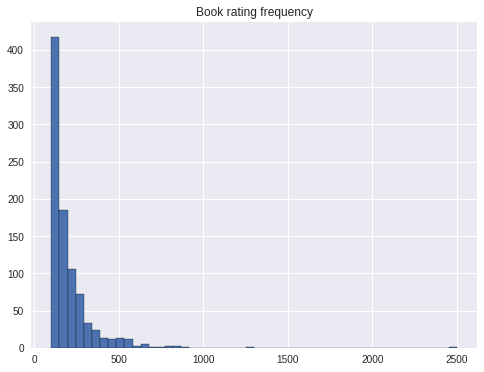

In [16]:
"""From the output, you can see that most of the books have received less than 150 ratings. 
While the number of books having more than 150 ratings is very low. 
In order to get good distribution of the data set in the next plot, we need to get rid of rating less than 150"""

import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style('dark')  
%matplotlib inline

plt.figure(figsize=(8,6))

plt.title('Book rating frequency')
plt.grid()
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_counts'].hist(bins=50)  


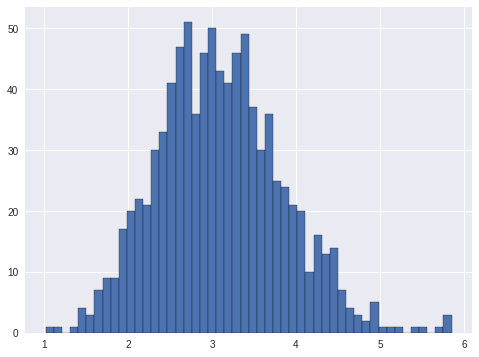

In [18]:
""" In the second plot, in order to get a very interesting normal distribution
and to care about performance of recommendation algorithms, we removed rating less than 150
The output will show an interesting distribution similar to a normal distribution"""
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['bookRating'].hist(bins=50) 

# Recommender System based on Pearson's Correlation

Now that we have done some visualisations about data, it is time to try using some interesting algorithms on recommender systems. The first one is based on similarities between books. The Pearson's correlation coeficient we are going to use, measures the lineair correlation between two variables. The basic principle of the method is that if we suppose that the rate attributed to books by users $U_i$ and $U_j$ are random incomplete  vectors $X_i\in \mathbf{R}^n$ and $X_j\in \mathbf{R}^m$ of an unknow distribution, therefore it is possible to define the linear correlation between $X_i$ and $X_j$ using Pearson's formula given by:
$\rho = \frac{Cov(X_i,X_j)}{\sqrt{Var(X_i)} \times \sqrt{Var(X_j)}}$. Where $Cov(X_i,X_j) = \mathbf{E}[(X_i-\mathbf{E}(X_i))\times (X_j-\mathbf{E}(X_j))]$. As indicated in the formula we must find out the average rating of each book in the dataset, count the occurence rating of each book and hence getting rid of users with less than 200 ratings and books with less than 100 rating for more accuracy as stupiled in the "Building A Book Recommender System – The Basics, kNN and Matrix Factorization" tutorial.

In [29]:

    # compute the average rating of books rating
ratings_mean_count = pd.DataFrame(books_data.groupby('ISBN')['bookRating'].mean())
        #count the book rating for each ISBN
ratings_mean_count['rating_counts'] = pd.DataFrame(books_data.groupby('ISBN')['bookRating'].count())
    #return ratings_mean_count
        

In [30]:

counts = ratings['bookRating'].value_counts()
ratings_mean_count = ratings_mean_count[ratings_mean_count['rating_counts']>100]
ratings_mean_count.sort_values('rating_counts', ascending=False).head()

,bookRating,rating_counts
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [31]:

    #count the numbers of rating for each users
count_users = ratings['userID'].value_counts()
    # get rid of users with less than 200 ratings
ratings = ratings[ratings['userID'].isin(count_users [count_users  >= 200].index)]
    #count number of rating for each book
count_rating = ratings['bookRating'].value_counts()
    #get rid of books with less than 100 rating
ratings = ratings[ratings['bookRating'].isin( count_rating[ count_rating >= 100].index)]
    


In [32]:
"""The following code creates the matrix where each column contains all the rating users
for a particular book and the rows shows all the ratings for a particular users."""

#create a matrix where columns are ISBN and rows are userID
ratings_matrix = ratings.pivot(index='userID', columns='ISBN').bookRating
# display the shape of the matrix
print(ratings_matrix.shape)
# print the 5 first rows of the matrix
ratings_matrix.head()


(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have our matrix, we need to apply the correlation method as stupilated above. To do that, We pick randomly a book and try to find out wich books are simular to it. let pick the second top rated book especially because of its average rating of 4.46, the Lovely Bones: A Novel. First we pick its ISBN from the matrix, secondly we apply the method corrwith() that will compute the correlation between the book The lovely bones with the remainder of books in the matrix, and finaly as the function will return a list of ISBN, we need to look for every ISBN its corresponding book from the dataset (table) books. Let's go on!

In [33]:
""" As we have the matrix, we can now developp the pearson's correlation method that tkes as in put a given book, 
then display the correlation between the given book and others from the matrixNow that we have our matrix,
we need to apply the correlation method as stupilated above. To do that, 
We pick randomly a book and try to find out wich books are simular to it. let pick the second top rated book 
especially because of its average rating of 4.46, the Lovely Bones: A Novel.First we pick its ISBN from the matrix, 
secondly we apply the method corrwith() that will compute the correlation between the book The lovely bones 
with the remainder of books in the matrix, and finaly as the function will return a list of ISBN,
we need to look for every ISBN its corresponding book from the dataset (table) books. Let's go on!"""
def correlation(lovely_bone_ratings):
    # correlate books from the matrix with the book lovely Bones: The Novel
    books_like_lovely_bones = ratings_matrix.corrwith(lovely_bone_ratings)
    # print the correlated of overy book with the book Lovely Bones
    corr_lovely_bones = pd.DataFrame(books_like_lovely_bones, columns=['Correlation']) 
    # drop rows of pandas whose value in certain columns are NaN
    corr_lovely_bones.dropna(inplace=True) 
    corr_summary = corr_lovely_bones.join(ratings_mean_count['rating_counts'])
    # Keep only book with more than 100 ratings
    rr= corr_summary[corr_summary['rating_counts']>=100]
    return rr       

In [34]:
""" The script bellow shows how the ISBN of the book Lovely Bones is correlated with
the remainder of books from the matrix. It shows also the number of rating of books"""
# pick the ISBN of the book Lovely bones: the Novel
lovely_bone_ratings = ratings_matrix['0316666343']
# call of the method correlation
corr_book=correlation(lovely_bone_ratings)
# display the 10 first rows of the data frame
corr_book.sort_values('Correlation', ascending=False).head(10)


/home/joslain/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/joslain/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,rating_counts
ISBN,,
0316666343,1.000000,1295.0
0345441036,0.750588,106.0
0684867621,0.618834,118.0
0446519138,0.600658,107.0
0743206045,0.580833,114.0
0743203631,0.571624,127.0
0451160525,0.552370,148.0
038550120X,0.551362,184.0
0679772677,0.548236,129.0


In [35]:
""" Here we just pick each ISBN and find its corresponding variable"""
#The following function merges books_corr_to_bones data frame  with the books table, in order to identify the corresponding book for every ISBN.
import numpy as np
def book_title(list_ISBN ):   
# create a new pandas dataframe with five first ISBN from corr_summary
    books_corr_to_levely_bones = pd.DataFrame(list_ISBN, index=np.arange(5), columns=['ISBN'])
    corr_books_title = pd.merge(books_corr_to_levely_bones, books, on='ISBN')
    return corr_books_title



# define a list of ISBN
list_ISBN = ['0312291639', '0316601950', '0446610038', '0446672211','0385265700']
# call of the function book_title
book_title(list_ISBN )

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...
1,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...
2,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...
3,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
4,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...


# Recommender system based on collaboration filtering using k-Nearest Neighbors machine learning algorithm 

In [27]:
""" The second algorithm we are going to use for building a recommender system is based on a machine learning algorithm called K-nearest neighbours. 
The algorithm is going to find clusters of similar users based on common book rating. Basically we'll learn about euclidean distance and figure out which books are the most similar for a given book. 
Predictions are made using the average rating of top-k nearest neighbours. To do so, we are going to combine books table with ratings table in order to find the most popular books in the first step. The second step consists of filter data in order to keep only users from USA and CANADA.
This will help to avoid the problem of memory error. 
The third step consists of create a two dimensional matrix that will help to implement the k-Nearest Neighbours algorithm. """
# find the most popular books 
def combine():
    
    combine_book = pd.merge(ratings, books, on='ISBN')
    # select colomns to drop frame the created data frame
    columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
    #drop colums in the new datframe
    combine_book = combine_book.drop(columns, axis=1)
    
    return combine_book
combine_book=combine()

In [28]:
combine_book.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [29]:
# groupe book by title and create a new column that count the number of rating
def group_book_by_title(combine_book):
    # get rid of the column bookTitle
    combine_book = combine_book.dropna(axis = 0, subset = ['bookTitle'])
    # count bookRating and create a new column totalRatingCount
    book_rating_count = (combine_book.groupby(by = ['bookTitle'])['bookRating'].count().reset_index().rename(columns = {'bookRating': 'totalRatingCount'})[['bookTitle', 'totalRatingCount']])
    return book_rating_count
book_rating_count=group_book_by_title(combine_book)
book_rating_count.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [30]:
""" As we are looking for the most popular book rating, 
we need to combine rating data with total rating count data in order to filter out lesser-known books"""
def most_popular_book(combine_book):
    # combine book rating and total rating count
    rating_with_totalRatingCount = combine_book.merge(book_rating_count, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
    return rating_with_totalRatingCount

rating_with_totalRatingCount= most_popular_book(combine_book) 
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [31]:
""" The following function get rid of books with total rating less than 50"""
# filter books with rating less than 50.
def limit_number_of_rating(rating_with_totalRatingCount):
    popularity_threshold = 50
    rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
    return rating_popular_book

rating_popular_book=limit_number_of_rating(rating_with_totalRatingCount)
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


Now that we have every thing, we need to reduce data by keeping only user from US and Canada. And then combine user data with the rating data and total rating count data.

In [32]:
def filter_user(rating_popular_book):
    
    combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

    us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
    us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
    return us_canada_user_rating

user_from_us_canada_rating=filter_user(rating_popular_book)
user_from_us_canada_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa"
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa"
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"mechanicsville, maryland, usa"


To implement KNN, we need to convert user_from_us_canada_rating into a 2 dimensionnel matrix. In the matrix we will fill the missing values with $0$. Then we transform the rating of the matrix into a scipy sparse matrix.

In [33]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
def convert_table_to_matrix(user_from_us_canada_rating):
    # get rid of duplicated data
    user_from_us_canada_rating = user_from_us_canada_rating.drop_duplicates(['userID', 'bookTitle'])
    #pivot the table into a matrix
    us_canada_user_rating_pivot = user_from_us_canada_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
    us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)
    return us_canada_user_rating_matrix,us_canada_user_rating_pivot

us_canada_user_rating_matrix,us_canada_user_rating_pivot=convert_table_to_matrix(user_from_us_canada_rating)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

The kNN algorithm measures distance to determine the “closeness” of vectors. It then classifies a vector by finding its nearest neighbors, and picks the most popular class among the neighbors. The following code pick randomly a book, and find out its nearest neighbors by computing the distance between them. Here  n_neighbors = 7.

In [38]:
# making recommendation by choosing randomly books
import numpy as np
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
# compute the distance between vectors with the numbers of neighbors = 7
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].reshape(1, -1), n_neighbors = 7)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for  {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for  Engaging The Enemy:

1: Table For Two, with distance of 0.5336176453611992:
2: Truly, Madly Manhattan, with distance of 0.5917828594984483:
3: Message from Nam, with distance of 0.6228212410739596:
4: Summer Pleasures, with distance of 0.6419934967946633:
5: Jewels of the Sun (Irish Trilogy), with distance of 0.6463250483898633:
6: Key of Light (Key Trilogy (Paperback)), with distance of 0.6546282560501684:


/usr/lib/python3/dist-packages/ipykernel/__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


# Thank you